In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_features=10, 
    n_samples=1000, 
    n_informative=8,
    n_redundant=2,
    n_repeated=0,
    n_classes=2, 
    random_state=42
)

########### Decision tree with Gini as criteria

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
dec=DecisionTreeClassifier(criterion="gini",max_depth=10)

dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

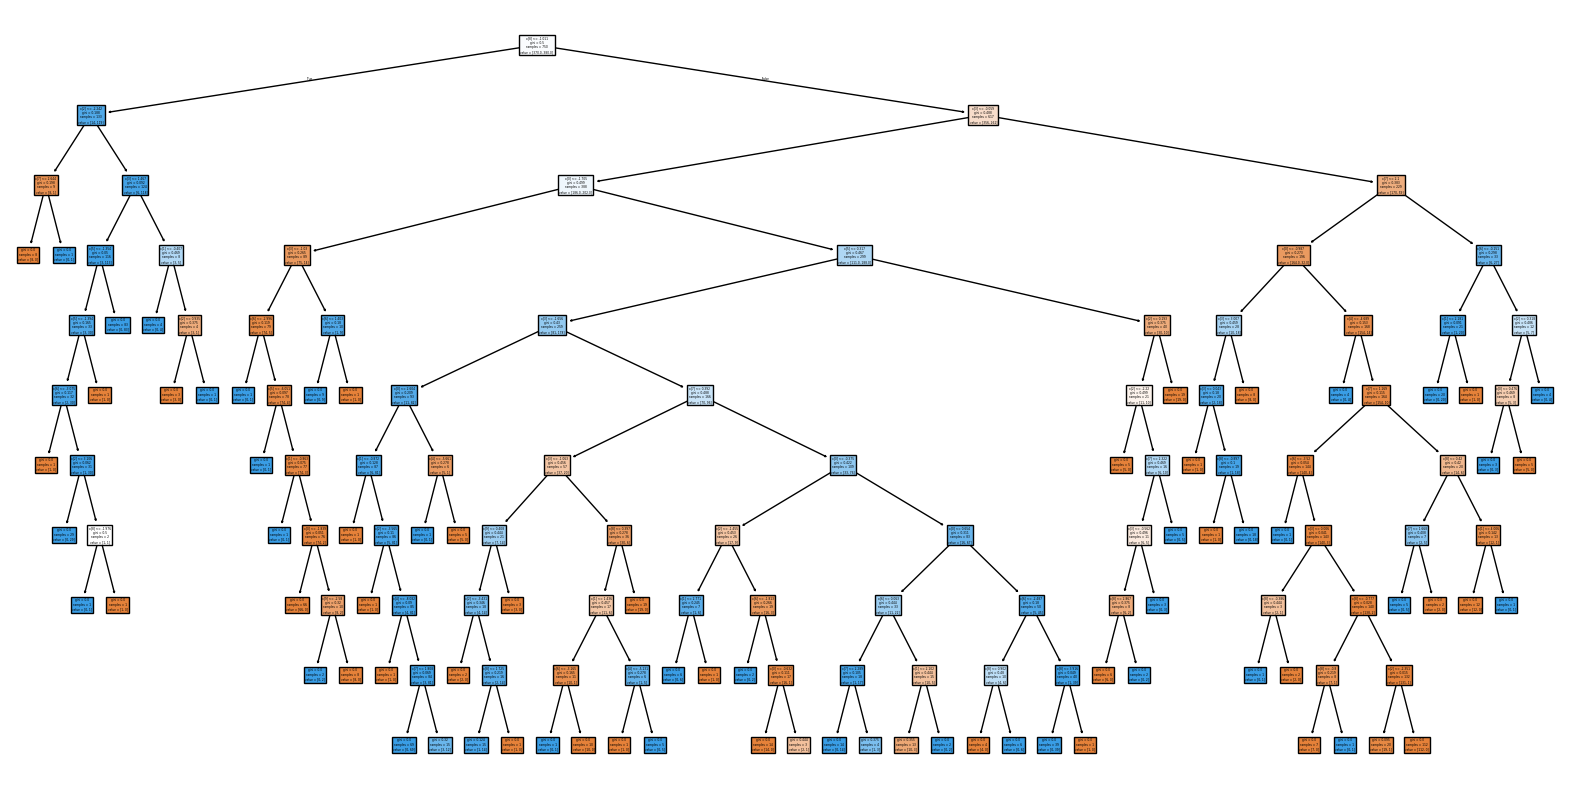

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(dec, filled=True)
plt.show()

In [9]:
y_pred = dec.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       130
           1       0.82      0.82      0.82       120

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(criterion="gini", max_depth=5), X, y, cv=5)

array([0.78 , 0.795, 0.755, 0.795, 0.77 ])

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(criterion="entropy", max_depth=5), X, y, cv=5)

array([0.765, 0.78 , 0.765, 0.815, 0.78 ])

### manually COnfiguring each parameter with Decision Tree

In [19]:
criterion = ["gini", "entropy"]
max_depth = [5, 10, 15]

avg_scores = {}

for c in criterion:
    for d in max_depth:
        clf = DecisionTreeClassifier(criterion=c, max_depth=d)
        score_list = cross_val_score(clf, X, y, cv=5)
        avg_scores[c + "_" + str(d)] = np.average(score_list)
        
avg_scores

{'gini_5': 0.774,
 'gini_10': 0.787,
 'gini_15': 0.7929999999999999,
 'entropy_5': 0.7779999999999999,
 'entropy_10': 0.795,
 'entropy_15': 0.8130000000000001}

In [21]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    DecisionTreeClassifier(),
    {'criterion': ["gini", "entropy"],'max_depth': [5, 10, 15]},
    cv=5,
    return_train_score=False
)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.01470456, 0.01538525, 0.01210241, 0.00993214, 0.01507511,
        0.01541491]),
 'std_fit_time': array([0.00116767, 0.00289754, 0.00071221, 0.000109  , 0.00054169,
        0.00059279]),
 'mean_score_time': array([0.00168042, 0.00123296, 0.00078664, 0.00071979, 0.00088654,
        0.00076451]),
 'std_score_time': array([1.41515227e-04, 4.68091504e-04, 4.10037260e-05, 1.55568808e-05,
        7.22134573e-05, 3.02010001e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 10, 15, 5, 10, 15],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'criterion': 'gini', 'max_depth': 5},
  {'criterion': 'gini', 'max_depth': 10},
  {'criterion': 'gini', 'max_depth': 15},
  {'criterion': 'entropy',

In [25]:
data=pd.DataFrame(clf.cv_results_)

In [29]:
data[["params","mean_test_score"]]

,params,mean_test_score
0,"{'criterion': 'gini', 'max_depth': 5}",0.779
1,"{'criterion': 'gini', 'max_depth': 10}",0.784
2,"{'criterion': 'gini', 'max_depth': 15}",0.797
3,"{'criterion': 'entropy', 'max_depth': 5}",0.780
4,"{'criterion': 'entropy', 'max_depth': 10}",0.785
5,"{'criterion': 'entropy', 'max_depth': 15}",0.809


In [31]:
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014705,0.001168,0.001680,0.000142,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.775,0.790,0.760,0.795,0.775,0.779,0.012410,6
1,0.015385,0.002898,0.001233,0.000468,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.765,0.740,0.805,0.795,0.815,0.784,0.027641,4
2,0.012102,0.000712,0.000787,0.000041,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.795,0.720,0.840,0.815,0.815,0.797,0.041061,2
3,0.009932,0.000109,0.000720,0.000016,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.765,0.780,0.765,0.810,0.780,0.780,0.016432,5
4,0.015075,0.000542,0.000887,0.000072,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.765,0.785,0.815,0.770,0.790,0.785,0.017607,3


In [33]:
model = clf.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [35]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [37]:
from sklearn import svm

model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ["gini", "entropy"],
            'max_depth': [5, 10, 15]
        }  
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']            
        }
    }
}

scores = []

for key, val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=5,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores

[{'model': 'decision_tree',
  'best_score': 0.8140000000000001,
  'best_params': {'criterion': 'entropy', 'max_depth': 15}},
 {'model': 'svm',
  'best_score': 0.9260000000000002,
  'best_params': {'C': 1, 'kernel': 'rbf'}}]

In [39]:
scr_df=pd.DataFrame(scores)

In [41]:
scr_df

,model,best_score,best_params
0,decision_tree,0.814,"{'criterion': 'entropy', 'max_depth': 15}"
1,svm,0.926,"{'C': 1, 'kernel': 'rbf'}"


In [45]:
from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(
    DecisionTreeClassifier(),
    {'criterion': ["gini", "entropy"],'max_depth': [5, 10, 15,20]},
    cv=5,
    return_train_score=False,  ### this will give trai model score using boolean
    n_iter=5
)
rand.fit(X, y)
rand.cv_results_

{'mean_fit_time': array([0.02083664, 0.00901456, 0.01265931, 0.01058569, 0.01200309]),
 'std_fit_time': array([0.00777224, 0.00082197, 0.00087603, 0.00020065, 0.00093585]),
 'mean_score_time': array([0.00171185, 0.00109491, 0.00089135, 0.00082426, 0.00097656]),
 'std_score_time': array([7.85765266e-04, 1.01103714e-04, 6.52486098e-05, 2.23226008e-05,
        2.05476208e-04]),
 'param_max_depth': masked_array(data=[20, 5, 15, 5, 10],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'gini'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 20, 'criterion': 'gini'},
  {'max_depth': 5, 'criterion': 'gini'},
  {'max_depth': 15, 'criterion': 'gini'},
  {'max_depth': 5, 'criterion': 'entropy'},
  {'max_depth': 10, 'criterion': 'gini'}],
 'split0_test_score': array([0.82 , 0.775, 0.815, 0.765, 0.77 ]),
 

In [48]:
rand.best_params_

{'max_depth': 15, 'criterion': 'gini'}